<a href="https://colab.research.google.com/github/anteaterst/BigDataStudy_All/blob/main/1027Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#파이썬에서 시간대정보는 전세계의 시간대 정보를 모앙둔 올슨 데이터베이스를 담고있는 라이브러리가 pytz라이브러리다


import pytz
import pandas as pd
import numpy as np

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [18]:
tz = pytz.timezone('America/New_York')

In [19]:
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [20]:
#판다스의 메서드에서는 시간대 이름이나 객체를 모두 사용할 수 있지만 
#시간대 이름을 사용하길 권장한다 


In [21]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-03-09 09:30:00   -1.229031
2012-03-10 09:30:00    1.774981
2012-03-11 09:30:00    2.114994
2012-03-12 09:30:00   -1.577806
2012-03-13 09:30:00    0.309325
2012-03-14 09:30:00    0.717671
Freq: D, dtype: float64

In [22]:
print(ts.index.tz)

None


In [24]:
ts

2012-03-09 09:30:00   -1.229031
2012-03-10 09:30:00    1.774981
2012-03-11 09:30:00    2.114994
2012-03-12 09:30:00   -1.577806
2012-03-13 09:30:00    0.309325
2012-03-14 09:30:00    0.717671
Freq: D, dtype: float64

In [27]:
ts_utc = ts.tz_localize('UTC')

In [28]:
ts_utc

2012-03-09 09:30:00+00:00   -1.229031
2012-03-10 09:30:00+00:00    1.774981
2012-03-11 09:30:00+00:00    2.114994
2012-03-12 09:30:00+00:00   -1.577806
2012-03-13 09:30:00+00:00    0.309325
2012-03-14 09:30:00+00:00    0.717671
Freq: D, dtype: float64

In [29]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [30]:
ts_utc.tz_convert('America/New_York')

# 위 식열의 경우 America/New_York 시간대에서 일광절약시간을 사용하고 있는데 
# 동부 표준시로 맞춘다음 UTC혹은 베를릭 시간대로 변환할 수 있다 


2012-03-09 04:30:00-05:00   -1.229031
2012-03-10 04:30:00-05:00    1.774981
2012-03-11 05:30:00-04:00    2.114994
2012-03-12 05:30:00-04:00   -1.577806
2012-03-13 05:30:00-04:00    0.309325
2012-03-14 05:30:00-04:00    0.717671
Freq: D, dtype: float64

In [33]:
ts_eastern = ts.tz_localize('America/New_York')

In [34]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -1.229031
2012-03-10 14:30:00+00:00    1.774981
2012-03-11 13:30:00+00:00    2.114994
2012-03-12 13:30:00+00:00   -1.577806
2012-03-13 13:30:00+00:00    0.309325
2012-03-14 13:30:00+00:00    0.717671
dtype: float64

In [36]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [37]:
# 만약 두 기간이 같은 빈도를 가진다면 두 기간의 차는 둘 사이의 간격이 된다
#일반적인 기간 범위는 period_range 함수로 생성할 수 있다 .


p + 5

Period('2012', 'A-DEC')

In [38]:
p - 2

Period('2005', 'A-DEC')

In [39]:
pd.Period('2014',freq='A-DEC') -p

<7 * YearEnds: month=12>

In [42]:
rng = pd.period_range('2000-01-01', '2000-06-30',freq='M')

In [43]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [44]:
pd.Series(np.random.randn(6), index=rng)

2000-01    0.538671
2000-02   -1.235386
2000-03   -0.195567
2000-04    0.475336
2000-05    1.594554
2000-06    1.054819
Freq: M, dtype: float64

In [46]:
values = ['2001Q3','2002Q2','2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index


#문자열 배열을 이용해서 Periodindex 클래스를 생성한다. 

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [47]:
#타임 스탬프와 기간 변환하기
#타임 스탬프로 색인된 Seires와 DataFrame 객체는 to_Period메서드를 사용해서 기간으로 변환 가능 


#여기서 말하는 기간은 겹치지 않는 시간상의 간격을 뜻한다 


In [48]:
## 배열로 PeriodIndex 생성 

#고정된 빈도를 갖는 데이터는 종종 여러컬럼에 걸쳐 기간에 대한 정보를 함께 저장하기도 한다.


In [49]:
data = pd.read_csv('macrodata.csv')

data.head(5)


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [50]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [51]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [54]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')

In [55]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [56]:
data.index = index

In [57]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [58]:
# 리샘플링은 시계열의 빈도를 변환하는 과정 
#다운 샘플링은 상위빈도의 데이터를 하위빈도로 집계
#리샘플링과 빈도 변환 업 샘플링은 하위 빈도의 데이터를 상위빈도로 집계 



In [59]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')


In [60]:
ts= pd.Series(np.random.randn(len(rng)), index=rng)

In [61]:
ts

2000-01-01   -0.121061
2000-01-02   -0.184720
2000-01-03   -0.725421
2000-01-04    0.190600
2000-01-05   -0.719148
                ...   
2000-04-05   -0.406277
2000-04-06   -1.995619
2000-04-07    0.093718
2000-04-08    0.771976
2000-04-09    1.700290
Freq: D, Length: 100, dtype: float64

In [62]:
ts.resample('M').mean()

2000-01-31    0.047746
2000-02-29   -0.142058
2000-03-31   -0.432977
2000-04-30    0.005922
Freq: M, dtype: float64

In [63]:
ts.resample('M', kind='period').mean()

2000-01    0.047746
2000-02   -0.142058
2000-03   -0.432977
2000-04    0.005922
Freq: M, dtype: float64

In [64]:
# 다운 샘플링

# 시계열 데이터를 규칙적인 하위 빈도로 집계하는 일은 특별한 일은 아닏 ㅏ집계한 데이터는 고정빈도를 가질 필요가 없다.



In [65]:
rng = pd.date_range('2001-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)

In [66]:
ts

2001-01-01 00:00:00     0
2001-01-01 00:01:00     1
2001-01-01 00:02:00     2
2001-01-01 00:03:00     3
2001-01-01 00:04:00     4
2001-01-01 00:05:00     5
2001-01-01 00:06:00     6
2001-01-01 00:07:00     7
2001-01-01 00:08:00     8
2001-01-01 00:09:00     9
2001-01-01 00:10:00    10
2001-01-01 00:11:00    11
Freq: T, dtype: int64

In [67]:
ts.resample('5min', closed='right').sum()

2000-12-31 23:55:00     0
2001-01-01 00:00:00    15
2001-01-01 00:05:00    40
2001-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [68]:
ts.resample('5min', closed='right').sum()


2000-12-31 23:55:00     0
2001-01-01 00:00:00    15
2001-01-01 00:05:00    40
2001-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [69]:
ts.resample('5min', closed='right',label='right').sum()

2001-01-01 00:00:00     0
2001-01-01 00:05:00    15
2001-01-01 00:10:00    40
2001-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [70]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  """Entry point for launching an IPython kernel.


2000-12-31 23:59:59     0
2001-01-01 00:04:59    15
2001-01-01 00:09:59    40
2001-01-01 00:14:59    11
Freq: 5T, dtype: int64

In [72]:
ts.resample('5min').ohlc()
# 금융분야에서 시계열데이터를집계하는 흔한방식은 4가지 값을 계산하는 것이다. 시가 고가 종가


,open,high,low,close
2001-01-01 00:00:00,0,4,0,4
2001-01-01 00:05:00,5,9,5,9
2001-01-01 00:10:00,10,11,10,11


In [73]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000',periods=2,
                                         freq='W-WED'),
                     columns=['Colorado','Texas','New York','Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.852492,1.578666,-0.544689,0.383622
2000-01-12,0.489803,-0.070719,0.497622,0.671612


In [74]:
df_daily = frame. resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.852492,1.578666,-0.544689,0.383622
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.489803,-0.070719,0.497622,0.671612


In [75]:
## 이 데이터에 요약함수를 사용하면 그룹당 하나의 값이 들어가고 그사이에 결측지가 들어간다.
# sfreq매서드를 이용하면 어떤 요약함수도 사용하지 않고 상위 빈도로 리샘플링 할 수 있다 



In [76]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000','12-2001',
                                           freq='M'),
                     columns=['Colorado','Texas','New York','Ohio'])

In [77]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.795115,-1.075460,-0.376621,-0.935854
2000-02,0.206191,1.879558,0.575634,1.301586
2000-03,0.293636,1.156968,-0.064625,0.129455
2000-04,-0.105644,-0.612364,0.226097,0.465716
2000-05,-0.036777,0.303133,0.456646,1.205436


In [78]:
annual_frame = frame.resample('A-DEC').mean()

In [79]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.096750,0.122350,0.120463,0.312580
2001,0.448957,-0.137557,-0.012899,-0.241888


In [80]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.096750,0.122350,0.120463,0.312580
2000Q2,0.096750,0.122350,0.120463,0.312580
2000Q3,0.096750,0.122350,0.120463,0.312580
2000Q4,0.096750,0.122350,0.120463,0.312580
2001Q1,0.448957,-0.137557,-0.012899,-0.241888
2001Q2,0.448957,-0.137557,-0.012899,-0.241888
2001Q3,0.448957,-0.137557,-0.012899,-0.241888
2001Q4,0.448957,-0.137557,-0.012899,-0.241888


In [81]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.096750,0.122350,0.120463,0.312580
2001Q1,0.096750,0.122350,0.120463,0.312580
2001Q2,0.096750,0.122350,0.120463,0.312580
2001Q3,0.096750,0.122350,0.120463,0.312580
2001Q4,0.448957,-0.137557,-0.012899,-0.241888


In [82]:
#사계열 연산에서 사용되는 배열변형에서 중요한 요소는 움직이는 창
# 또는 지수 가중과 함께 수행되는 통계와 여타 함수들이다 이러한 함수를 이용해서
# 누락된 데이터로 인개 매끄럽지 않은 시계열 데이터를 매끄럽게 다듬을 수 있다 


In [86]:
close_px_all = pd.read_csv('stock_px_2.csv',
                           parse_dates=True, index_col=0)

In [94]:
close_px = close_px_all[['AAPL','MSFT','XOM']]

In [95]:
close_px = close_px.resample('B').ffill()

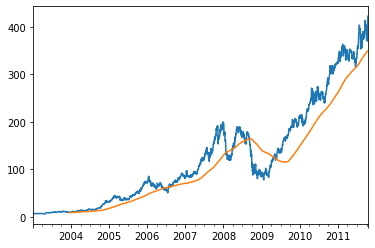

In [98]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [99]:
## 이제 resample이나 groupby와 유사하게 작동하는 rolling 연산을 알아보자
# 이것은 Series나 DataFrame에 대해 원하는 기간을 나타내는 windows 값과 함께 호출 할 수 있다.

#rolling(250) 이라는 표현은 groupby와 비슷해보이지만 그룹을 생성하는 대신
# 250일 크기의 움직이는 창을 통해 그룹핑 할 수 있는 객체를 생성한다. 

In [100]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

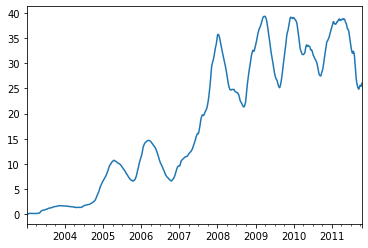

In [101]:
appl_std250.plot()

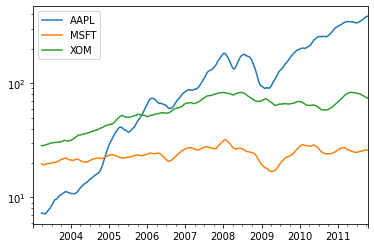

In [102]:
close_px.rolling(60).mean().plot(logy=True)

In [103]:
## 확장창 평균을 구하기 위해서는 rolling 대신 expanding을 사용한다.
# 확장창 평균은 시계열 시작 지점부터 창의 크기가 시계열 전체 크기가 될 때까지 점점 창의 크기를 늘린다.


In [104]:
#지금까지 다양한 종류의 데이터를 다듬는 과정 numpy pandas 그리고 다른 라이브러리의 기능을 소개했다. 
#시간이 갈수록 pandas에는 고급사용자들을 위한 깊이있는 기능들이 추가되고 있다. 이장에서는 고급판다스 기능을 소개한다

## 범주형 데이터

# 이 절에서는 pandas Categorical 형을 이용하여 pandas 메모리 사용을 줄이고 성능을 개선할 수 있는 방법을 소개한다.


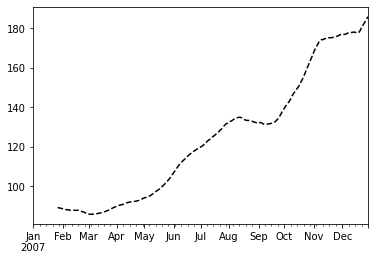

In [106]:
aapl_px = close_px.AAPL['2007':'2007']

ma60 = aapl_px.rolling(30, min_periods=20).mean()

ewma60 = aapl_px.ewm(span=30).mean()

ma60.plot(style='k--',label='Simple MA')


2007-01-01     84.840000
2007-01-02     84.840000
2007-01-03     84.469974
2007-01-04     84.797870
2007-01-05     84.855235
                 ...    
2007-12-25    184.441775
2007-12-26    185.377789
2007-12-27    186.228900
2007-12-28    187.106390
2007-12-31    187.814365
Freq: B, Name: AAPL, Length: 261, dtype: float64

In [108]:
import numpy as np; import pandas as pd

In [109]:
values = pd.Series(['apple','orange','apple','apple']*2)

In [110]:
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [111]:
#데이터 웨어하우스, 분석 컴퓨팅 외 여러 다양한 데이터 시스템은 중복되는 데이터를 얼마나 효율적으로 저장하고
# 계산할수 있는가를 중점으로 개발한다.

## 차원테이블과 정수키를 사용하는 것이 일반적이다. 

pd.unique(values)


array(['apple', 'orange'], dtype=object)

In [112]:
pd.value_counts(values)

apple     6
orange    2
dtype: int64

In [113]:
values = pd.Series([0,1,0,0] * 2)
dim = pd.Series(['apple','orange'])
values
dim

0     apple
1    orange
dtype: object

In [114]:
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

In [115]:
#여기서 정수로 표현된 값은 범주형 또는 사전형 표기법이라고 한다 
#(딕셔너리 표기법) 별개의 값을 담고 있는 배열은 범주 사전 또는 단계 데이터라고 부른다.
#이 책에서는 이런종류의 데이터를 cateforical 또는 범주형 데이터라고 부른다


#범주형 표기법을 사용하면 분석작업에 있어서 엄청난 성능향상을 얻을 수 있다.
#비교적 작은 연산으로 수행할 수 있는 변형의 예는 
## Renaming categories( 범주형 데이터 이름변경)
## 기존 범주형  데이터의 순서를 바꾸지 않고 새로운 범주 추가 



In [ ]:
#fruit_cat의 값은 bumpy 배열이 아니라 pandas.Categorical의 인스턴스이다.

# 카테고리 객체는 카테고리와 코드 속성을 가진다 
